# Importación de datos

In [39]:

import pandas as pd
import matplotlib.pyplot as plt

# Cargar los CSV


url_1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url_2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url_3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url_4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda_1 = pd.read_csv(url_1)
tienda_2 = pd.read_csv(url_2)
tienda_3 = pd.read_csv(url_3)
tienda_4 = pd.read_csv(url_4)

# Lista para recorrer
tiendas = [tienda_1, tienda_2, tienda_3, tienda_4]
nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Limpiar y calcular facturación
facturaciones = []

 # 1. Análisis de facturación

Tienda 1 - Facturación: $1,150,880,400.00
Tienda 2 - Facturación: $1,116,343,500.00
Tienda 3 - Facturación: $1,098,019,600.00
Tienda 4 - Facturación: $1,038,375,700.00
     Tienda   Facturación
0  Tienda 1  1.150880e+09
1  Tienda 2  1.116344e+09
2  Tienda 3  1.098020e+09
3  Tienda 4  1.038376e+09


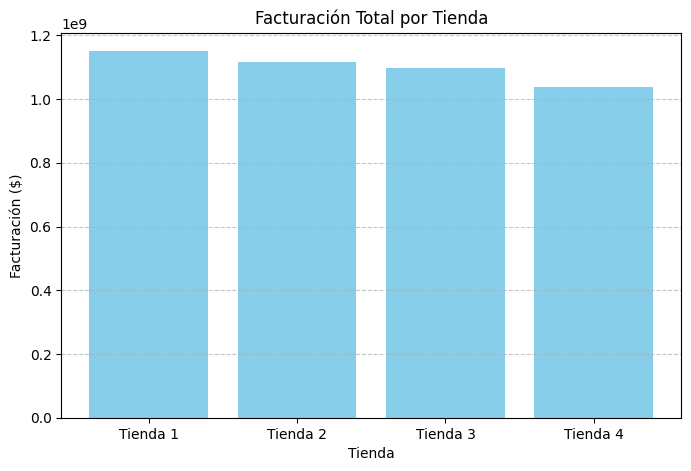

In [40]:

for i, tienda in enumerate(tiendas):
    tienda['Precio'] = pd.to_numeric(tienda['Precio'], errors='coerce')
    tienda = tienda.dropna(subset=['Precio'])
    facturacion = tienda['Precio'].sum()
    facturaciones.append(facturacion)
    print(f"{nombres[i]} - Facturación: ${facturacion:,.2f}")

# Crear dataframe resumen
resumen = pd.DataFrame({'Tienda': nombres, 'Facturación': facturaciones})

# Mostrar resumen ordenado
print(resumen.sort_values(by='Facturación', ascending=False))

# Gráfica
plt.figure(figsize=(8,5))
plt.bar(resumen['Tienda'], resumen['Facturación'], color='skyblue')
plt.title('Facturación Total por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Facturación ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 2. Ventas por categoría

Cantidad de ventas por categoría:
Categoría del Producto
Muebles                    1886
Electrónicos               1772
Juguetes                   1290
Electrodomésticos          1149
Deportes y diversión       1113
Instrumentos musicales      753
Libros                      742
Artículos para el hogar     730
Name: count, dtype: int64

Facturación total por categoría:
Categoría del Producto
Artículos para el hogar    5.757980e+07
Deportes y diversión       1.429777e+08
Electrodomésticos          1.324751e+09
Electrónicos               1.660576e+09
Instrumentos musicales     3.487726e+08
Juguetes                   7.360440e+07
Libros                     3.769610e+07
Muebles                    7.576610e+08
Name: Precio, dtype: float64


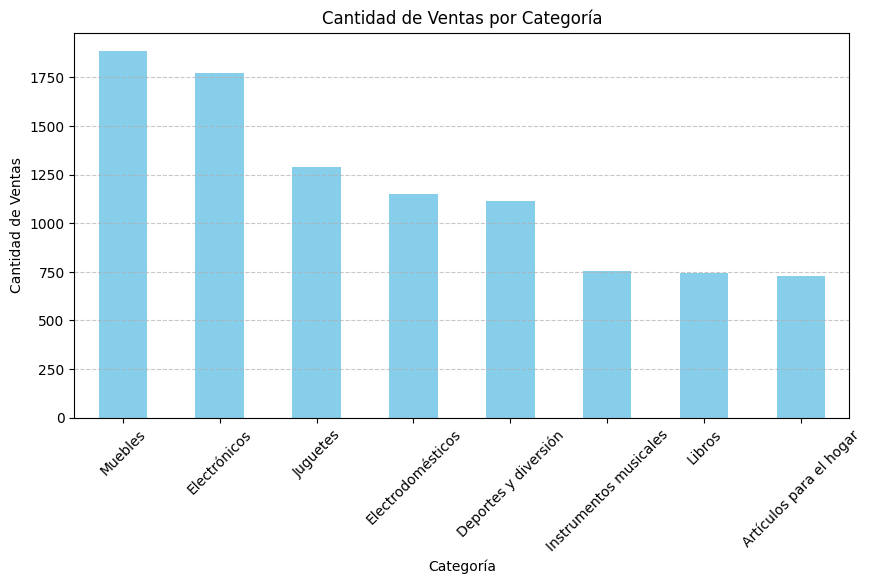

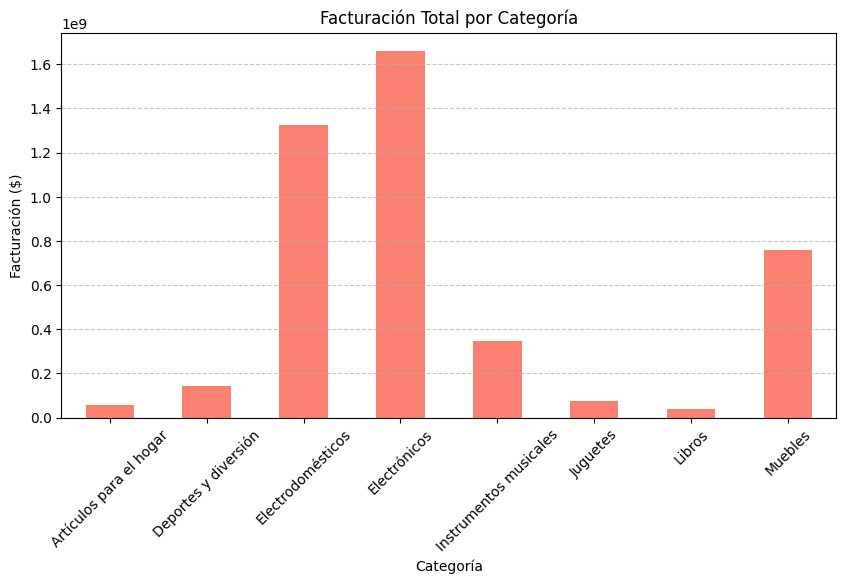

In [41]:
tiendas = [tienda_1, tienda_2, tienda_3, tienda_4]

# Concatenar todas las tiendas en un solo dataframe
ventas_total = pd.concat(tiendas, ignore_index=True)

# Limpiar datos necesarios
ventas_total['Precio'] = pd.to_numeric(ventas_total['Precio'], errors='coerce')
ventas_total = ventas_total.dropna(subset=['Precio', 'Categoría del Producto'])

# Agrupar por categoría (cantidad de ventas)
cantidad_por_categoria = ventas_total['Categoría del Producto'].value_counts()

# Agrupar por categoría (facturación total)
facturacion_por_categoria = ventas_total.groupby('Categoría del Producto')['Precio'].sum()

# Mostrar resultados
print("Cantidad de ventas por categoría:")
print(cantidad_por_categoria)

print("\nFacturación total por categoría:")
print(facturacion_por_categoria)

# Gráfica de cantidad de ventas
plt.figure(figsize=(10,5))
cantidad_por_categoria.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Ventas por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Ventas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

# Gráfica de facturación
plt.figure(figsize=(10,5))
facturacion_por_categoria.plot(kind='bar', color='salmon')
plt.title('Facturación Total por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Facturación ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

# 3. Calificación promedio de la tienda


Tienda 1 - Calificación Promedio: 3.98
Tienda 2 - Calificación Promedio: 4.04
Tienda 3 - Calificación Promedio: 4.05
Tienda 4 - Calificación Promedio: 4.00
     Tienda  Calificación Promedio
2  Tienda 3               4.048326
1  Tienda 2               4.037304
3  Tienda 4               3.995759
0  Tienda 1               3.976685


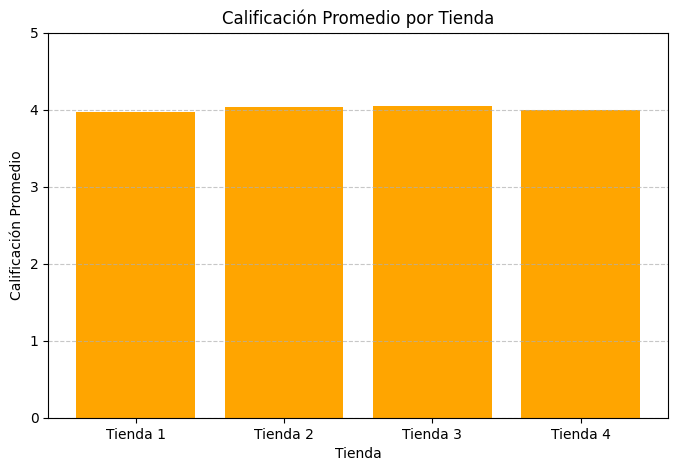

In [25]:
tiendas = [tienda_1, tienda_2, tienda_3, tienda_4]
nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Calcular calificación promedio
promedios = []
for i, tienda in enumerate(tiendas):
    tienda['Calificación'] = pd.to_numeric(tienda['Calificación'], errors='coerce')
    promedio = tienda['Calificación'].mean()
    promedios.append(promedio)
    print(f"{nombres[i]} - Calificación Promedio: {promedio:.2f}")

# Crear dataframe resumen
resumen = pd.DataFrame({'Tienda': nombres, 'Calificación Promedio': promedios})

# Mostrar resumen ordenado
print(resumen.sort_values(by='Calificación Promedio', ascending=False))

# Gráfica
plt.figure(figsize=(8,5))
plt.bar(resumen['Tienda'], resumen['Calificación Promedio'], color='orange')
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 3.1 Calificación promedio por categoría

Categoría del Producto
Juguetes                   4.070543
Muebles                    4.033934
Electrodomésticos          4.014795
Libros                     4.004043
Instrumentos musicales     4.003984
Electrónicos               3.992664
Deportes y diversión       3.988320
Artículos para el hogar    3.979452
Name: Calificación, dtype: float64


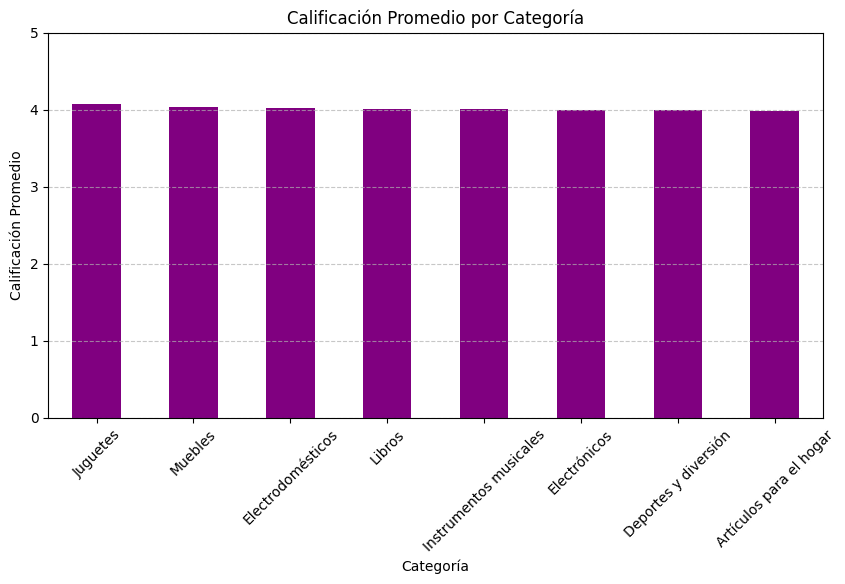

In [26]:
calificacion_categoria = ventas_total.groupby('Categoría del Producto')['Calificación'].mean().sort_values(ascending=False)
print(calificacion_categoria)

# Gráfica
calificacion_categoria.plot(kind='bar', color='purple', figsize=(10,5))
plt.title('Calificación Promedio por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Calificación Promedio')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

## 3.2 Calificación promedio por vendedor

Vendedor
Ángel Rodriguez    4.134503
Felipe Santos      4.075606
Mariana Herrera    4.071646
Rafael Acosta      4.064000
Beatriz Morales    4.047692
Pedro Gomez        4.041221
Juan Fernandez     4.033141
Camila Rivera      4.032984
Santiago Silva     4.030769
Blanca Ramirez     3.994109
Lucas Olivera      3.962908
Maria Alfonso      3.957290
Juliana Costa      3.918759
Izabela de León    3.858871
Name: Calificación, dtype: float64


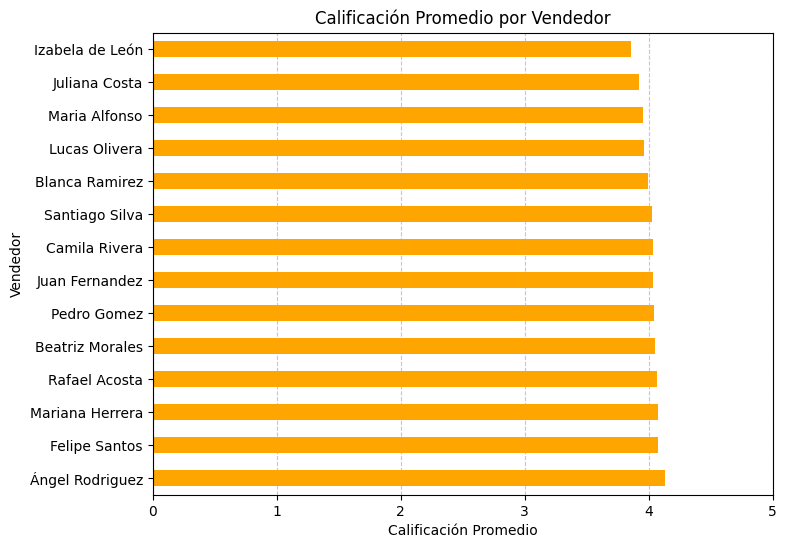

In [27]:
calificacion_vendedor = ventas_total.groupby('Vendedor')['Calificación'].mean().sort_values(ascending=False)
print(calificacion_vendedor)

# Gráfica
calificacion_vendedor.plot(kind='barh', color='orange', figsize=(8,6))
plt.title('Calificación Promedio por Vendedor')
plt.xlabel('Calificación Promedio')
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## 3.3 Histograma de distribución de calificaciones

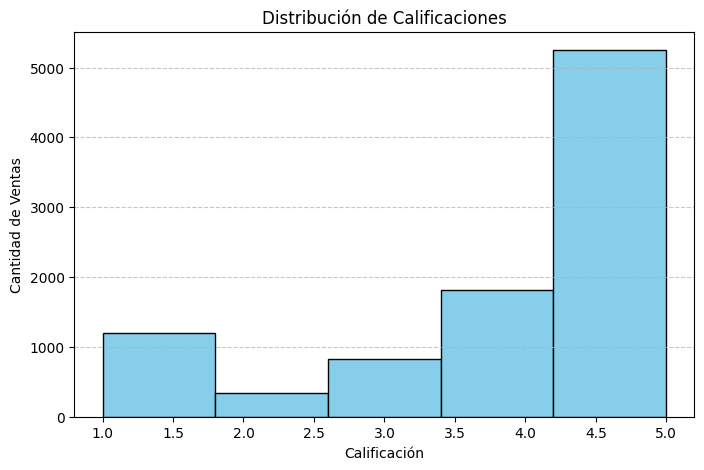

In [28]:
ventas_total['Calificación'].plot(kind='hist', bins=5, color='skyblue', edgecolor='black', figsize=(8,5))
plt.title('Distribución de Calificaciones')
plt.xlabel('Calificación')
plt.ylabel('Cantidad de Ventas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 3.4 Porcentaje de calificaciones 5 estrellas

Porcentaje de calificaciones de 5 estrellas: 55.64%
Calificación
1    12.708002
2     3.635400
3     8.797032
4    19.215686
5    55.643879
Name: count, dtype: float64


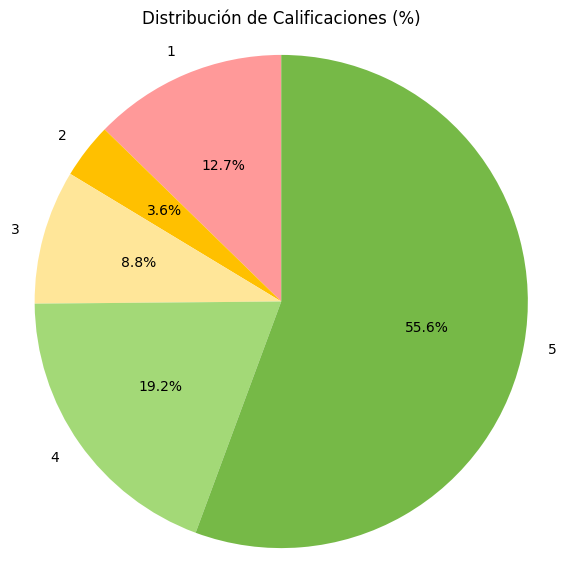

In [29]:
total_calificaciones = ventas_total['Calificación'].count()
calificacion_5 = ventas_total[ventas_total['Calificación'] == 5].shape[0]
porcentaje_5_estrellas = (calificacion_5 / total_calificaciones) * 100

print(f"Porcentaje de calificaciones de 5 estrellas: {porcentaje_5_estrellas:.2f}%")

# Contar cantidad de cada calificación
conteo_calificaciones = ventas_total['Calificación'].value_counts().sort_index()

# Calcular porcentaje
porcentaje_calificaciones = (conteo_calificaciones / conteo_calificaciones.sum()) * 100

# Mostrar porcentajes
print(porcentaje_calificaciones)

# Gráfica de pastel
plt.figure(figsize=(7,7))
plt.pie(porcentaje_calificaciones, labels=porcentaje_calificaciones.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#ffc000','#ffe699','#a3d977','#76b947'])
plt.title('Distribución de Calificaciones (%)')
plt.axis('equal')  # Círculo perfecto
plt.show()

# 4. Productos más y menos vendidos

Top 10 Productos Más Vendidos:
Producto
Mesa de noche                210
Carrito de control remoto    206
Microondas                   206
Batería                      203
Cama king                    201
Secadora de ropa             200
Modelado predictivo          200
Set de ollas                 200
Cama box                     199
Bloques de construcción      199
Name: count, dtype: int64

Top 10 Productos Menos Vendidos:
Producto
Olla de presión                172
Smartwatch                     172
Set de vasos                   169
Sillón                         168
Asistente virtual              167
Ciencia de datos con Python    166
Guitarra eléctrica             165
Mochila                        163
Auriculares con micrófono      158
Celular ABXY                   157
Name: count, dtype: int64


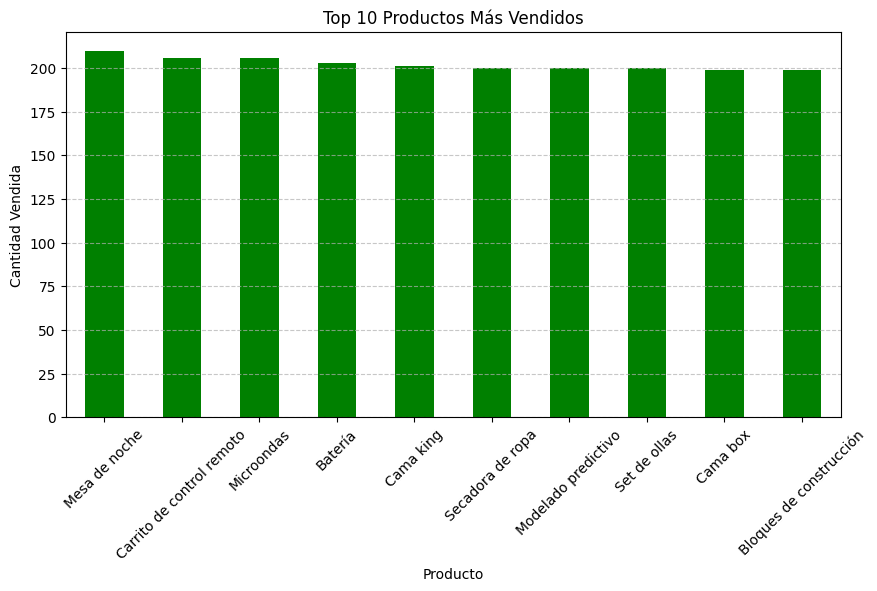

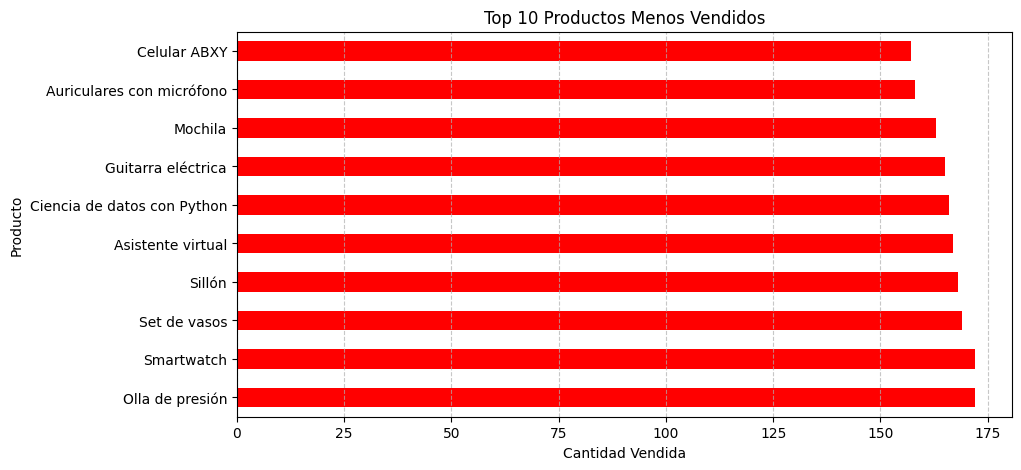

In [30]:
# Unir todas las ventas en un solo dataframe
ventas_total = pd.concat([tienda_1, tienda_2, tienda_3, tienda_4], ignore_index=True)

# Limpiar posibles NaNs en la columna Producto
ventas_total = ventas_total.dropna(subset=['Producto'])

# Contar cuántas veces se vendió cada producto
ventas_por_producto = ventas_total['Producto'].value_counts()

# Mostrar los 10 más vendidos
print("Top 10 Productos Más Vendidos:")
print(ventas_por_producto.head(10))

# Mostrar los 10 menos vendidos
print("\nTop 10 Productos Menos Vendidos:")
print(ventas_por_producto.tail(10))

# Gráfica de los 10 más vendidos
plt.figure(figsize=(10,5))
ventas_por_producto.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Productos Más Vendidos')
plt.xlabel('Producto')
plt.ylabel('Cantidad Vendida')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

# Gráfica de los 10 menos vendidos
plt.figure(figsize=(10,5))
ventas_por_producto.tail(10).plot(kind='barh', color='red')
plt.title('Top 10 Productos Menos Vendidos')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## 4.1 Productos más vendidos por tienda

In [31]:
productos_por_tienda = ventas_total.groupby(['Lugar de Compra', 'Producto']).size().reset_index(name='Cantidad Vendida')

# Top 5 productos más vendidos por tienda
top_productos_tienda = productos_por_tienda.groupby('Lugar de Compra').apply(lambda x: x.nlargest(5, 'Cantidad Vendida')).reset_index(drop=True)
print(top_productos_tienda)

   Lugar de Compra                 Producto  Cantidad Vendida
0          Armenia  Bloques de construcción                 4
1          Armenia              Tablet ABXY                 3
2          Armenia               Cubertería                 2
3          Armenia         Silla de oficina                 2
4          Armenia            TV LED UHD 4K                 2
..             ...                      ...               ...
90   Villavicencio                 Cama box                 5
91   Villavicencio                Bicicleta                 2
92   Villavicencio          Cubo mágico 8x8                 2
93   Villavicencio            Mesa de noche                 2
94   Villavicencio               Microondas                 2

[95 rows x 3 columns]


C:\Users\Pablo Álvarez A\AppData\Local\Temp\ipykernel_8536\3854471836.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_productos_tienda = productos_por_tienda.groupby('Lugar de Compra').apply(lambda x: x.nlargest(5, 'Cantidad Vendida')).reset_index(drop=True)


## 4.2 Calcular facturación total (precio × cantidad vendida)
Primero necesitamos asegurarnos de tener una columna con "Precio" y "Cantidad de cuotas" (si cuotas = cantidad vendida):

Lugar de Compra
Armenia          3.758590e+07
Barranquilla     4.373335e+08
Bogotá           4.957477e+09
Bucaramanga      3.137693e+08
Cali             1.476514e+09
Cartagena        3.729088e+08
Cúcuta           3.276642e+08
Inírida          3.876210e+07
Leticia          1.847413e+08
Manizales        7.373690e+07
Medellín         3.342985e+09
Neiva            7.485350e+07
Pasto            1.578270e+08
Pereira          7.212818e+08
Riohacha         2.523902e+08
Santa Marta      2.126688e+08
Soacha           4.678280e+07
Valledupar       1.743050e+07
Villavicencio    5.583840e+07
Name: Facturación, dtype: float64


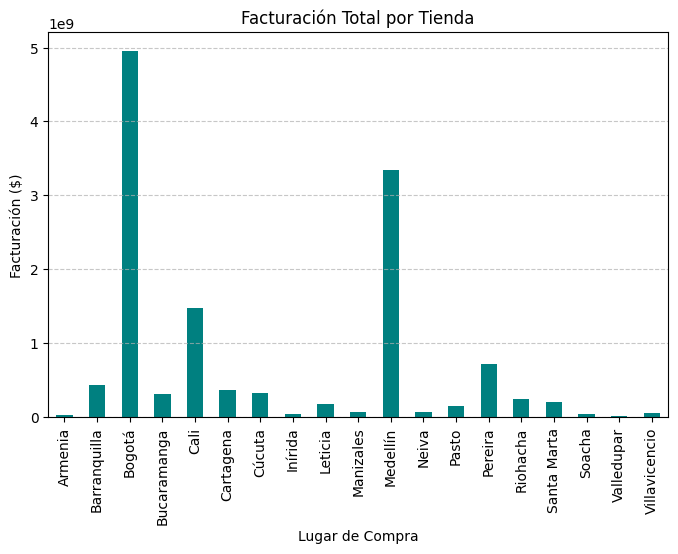

In [32]:
ventas_total['Facturación'] = ventas_total['Precio'] * ventas_total['Cantidad de cuotas']

# Facturación total por tienda
facturacion_tienda = ventas_total.groupby('Lugar de Compra')['Facturación'].sum()
print(facturacion_tienda)

# Gráfica de barras
facturacion_tienda.plot(kind='bar', color='teal', figsize=(8,5))
plt.title('Facturación Total por Tienda')
plt.ylabel('Facturación ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 4.3 Evolución por mes

C:\Users\Pablo Álvarez A\AppData\Local\Temp\ipykernel_8536\3001298810.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  ventas_total['Fecha de Compra'] = pd.to_datetime(ventas_total['Fecha de Compra'])


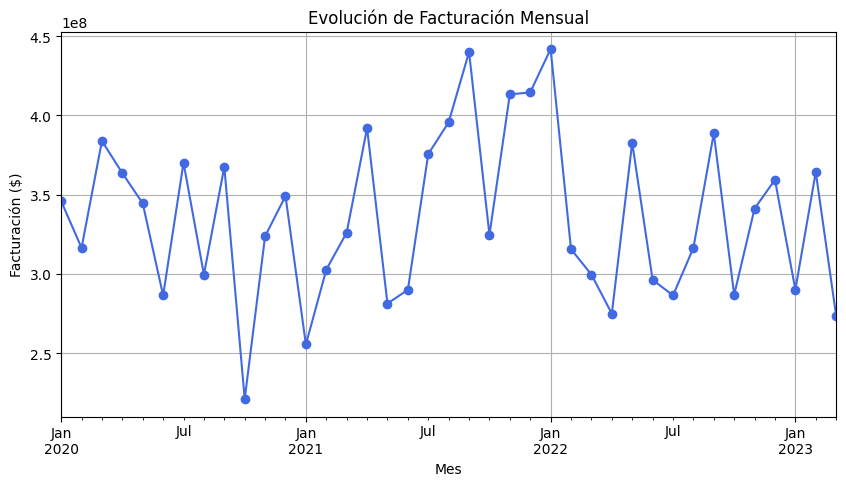

In [33]:
ventas_total['Fecha de Compra'] = pd.to_datetime(ventas_total['Fecha de Compra'])
ventas_total['Mes'] = ventas_total['Fecha de Compra'].dt.to_period('M')

ventas_por_mes = ventas_total.groupby('Mes')['Facturación'].sum()

# Gráfica de línea
ventas_por_mes.plot(kind='line', marker='o', color='royalblue', figsize=(10,5))
plt.title('Evolución de Facturación Mensual')
plt.xlabel('Mes')
plt.ylabel('Facturación ($)')
plt.grid(True)
plt.show()

## 4.5 Ranking por categoría

Categoría del Producto
Electrónicos               4.889815e+09
Electrodomésticos          4.019072e+09
Muebles                    2.221981e+09
Instrumentos musicales     1.044612e+09
Deportes y diversión       4.320055e+08
Juguetes                   2.116156e+08
Artículos para el hogar    1.703604e+08
Libros                     1.130887e+08
Name: Facturación, dtype: float64


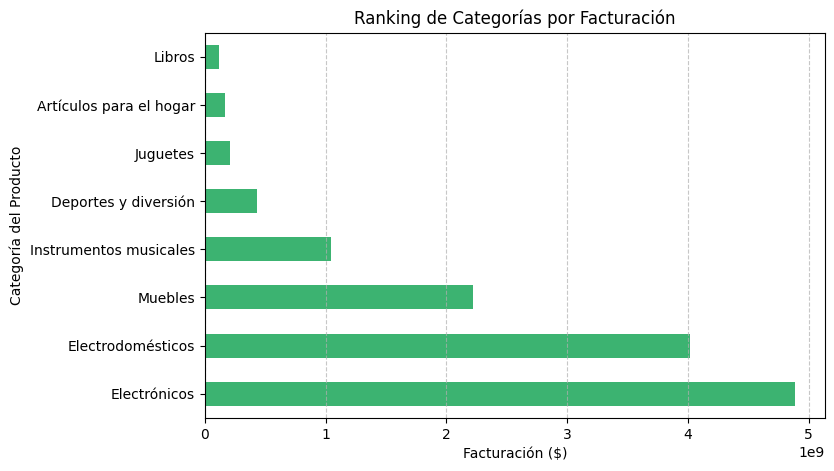

In [34]:
facturacion_categoria = ventas_total.groupby('Categoría del Producto')['Facturación'].sum().sort_values(ascending=False)
print(facturacion_categoria)

# Gráfica de barras horizontales
facturacion_categoria.plot(kind='barh', color='mediumseagreen', figsize=(8,5))
plt.title('Ranking de Categorías por Facturación')
plt.xlabel('Facturación ($)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 5. Envío promedio por tienda

## 5.1 Agrupar por tienda y obtener promedio de envío

In [35]:
envio_promedio_tienda = ventas_total.groupby('Lugar de Compra')['Costo de envío'].mean().sort_values(ascending=False)
print(envio_promedio_tienda)

Lugar de Compra
Soacha           34768.421053
Inírida          30557.142857
Cúcuta           28597.311828
Pasto            27801.063830
Neiva            27710.000000
Bucaramanga      26790.055249
Cali             26726.812314
Leticia          25317.605634
Medellín         25282.022472
Villavicencio    25100.000000
Manizales        24948.780488
Bogotá           24532.082171
Riohacha         24127.607362
Pereira          23211.411992
Armenia          22867.857143
Barranquilla     22692.258065
Cartagena        22638.429752
Valledupar       22021.428571
Santa Marta      18752.317881
Name: Costo de envío, dtype: float64


## 5.2 Añadir cantidad de ventas y total de envío (detalle adicional)

In [36]:
detalle_envio_tienda = ventas_total.groupby('Lugar de Compra').agg({'Costo de envío': ['mean', 'sum', 'count']})

detalle_envio_tienda.columns = ['Envío Promedio', 'Total Envíos', 'Cantidad de Ventas']
detalle_envio_tienda = detalle_envio_tienda.sort_values(by='Envío Promedio', ascending=False)
print(detalle_envio_tienda)

                 Envío Promedio  Total Envíos  Cantidad de Ventas
Lugar de Compra                                                  
Soacha             34768.421053      660600.0                  19
Inírida            30557.142857      427800.0                  14
Cúcuta             28597.311828     5319100.0                 186
Pasto              27801.063830     2613300.0                  94
Neiva              27710.000000     1108400.0                  40
Bucaramanga        26790.055249     4849000.0                 181
Cali               26726.812314    26913900.0                1007
Leticia            25317.605634     3595100.0                 142
Medellín           25282.022472    58502600.0                2314
Villavicencio      25100.000000      727900.0                  29
Manizales          24948.780488     1022900.0                  41
Bogotá             24532.082171    96730000.0                3943
Riohacha           24127.607362     3932800.0                 163
Pereira   

## 5.3 Gráfica de Envío Promedio por Tienda

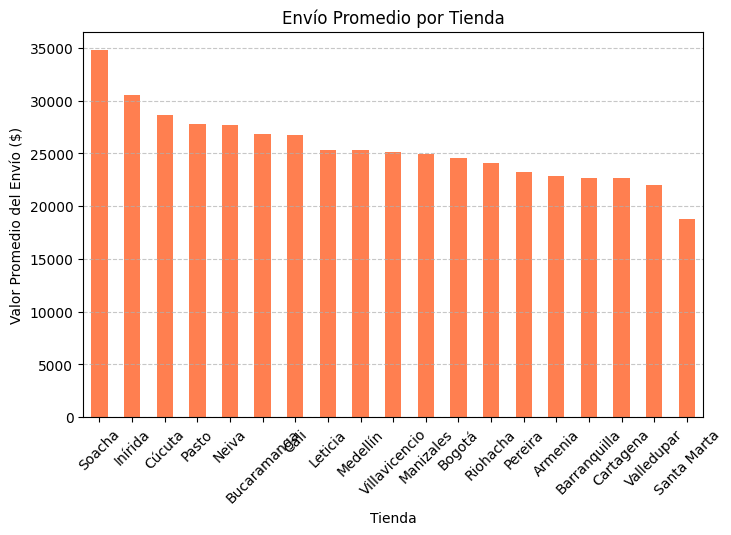

In [37]:
detalle_envio_tienda['Envío Promedio'].plot(kind='bar', color='coral', figsize=(8,5))
plt.title('Envío Promedio por Tienda')
plt.ylabel('Valor Promedio del Envío ($)')
plt.xlabel('Tienda')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

## 5.4 Gráfica de Total de Envíos cobrados

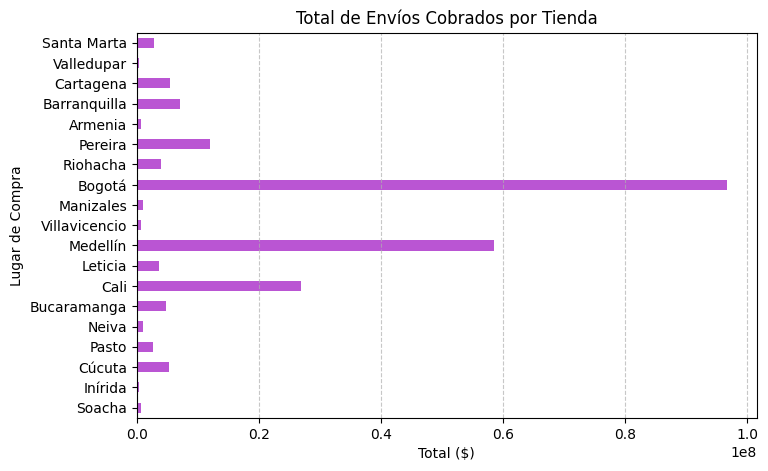

In [38]:
detalle_envio_tienda['Total Envíos'].plot(kind='barh', color='mediumorchid', figsize=(8,5))
plt.title('Total de Envíos Cobrados por Tienda')
plt.xlabel('Total ($)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()